In [1]:
from pylmeasure import *
import matplotlib.pyplot as plt
from pprint import pprint as pp

In [2]:
# Define a list of one or more SWC files to analyze
swcFiles = ['tests/testFiles/HB130408-1NS_VB.swc', 'tests/testFiles/D00V00C00S00_3ptSoma.swc']

## Single Measure Example

Compute a single measure of the whole cell

In [3]:
# Specify the L-Measures to compute (case-sensitive)
# Full list: http://cng.gmu.edu:8080/Lm/help/index.htm)
LMOutput = getMeasure(['Surface', 'Diameter'], swcFiles)

#                                              V-- measure index           V-- file index
print("Surface area of first file:",  LMOutput[0]["WholeCellMeasuresDict"][0]["TotalSum"])
print("Mean diameter in first file:", LMOutput[1]["WholeCellMeasuresDict"][0]["Average"])

('Surface area of first file:', 49599.4)
('Mean diameter in first file:', 1.46796)


In [4]:
print("Surface area of 2nd file:",    LMOutput[0]["WholeCellMeasuresDict"][1]["TotalSum"])
print("Mean diameter in 2nd file:",   LMOutput[1]["WholeCellMeasuresDict"][1]["Average"])

('Surface area of 2nd file:', 41398.9)
('Mean diameter in 2nd file:', 1.34663)


In [5]:
print("Diameter stats of first file")
pp(LMOutput[1]["WholeCellMeasuresDict"][0])

Diameter stats of first file
{'Average': 1.46796,
 'CompartmentsConsidered': 11677.0,
 'CompartmentsDiscarded': 0.0,
 'Maximum': 4.748,
 'Minimum': 0.406,
 'StdDev': 0.728944,
 'TotalSum': 17141.4}


# Distribution Example

This example computes the distribution of a measure

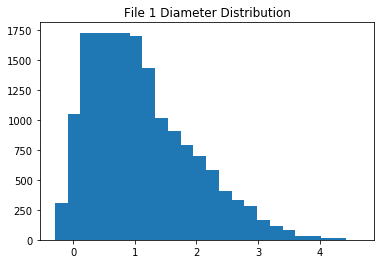

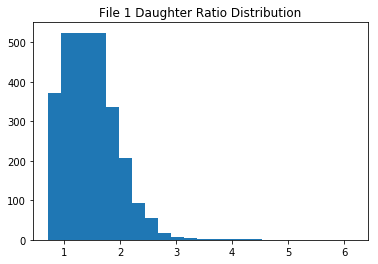

In [6]:
LMOutput = getMeasureDistribution(['Diameter', "Daughter_Ratio"], swcFiles, nBins=21)

file = 0
plt.bar(LMOutput[0]['measure1BinCentres'][file], LMOutput[0]['measure1BinCounts'][file])
plt.title("File 1 Diameter Distribution")
plt.show()

plt.bar(LMOutput[1]['measure1BinCentres'][file], LMOutput[1]['measure1BinCounts'][file])
plt.title("File 1 Daughter Ratio Distribution")
plt.show()

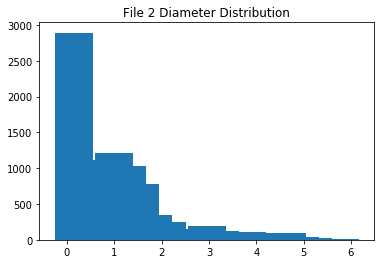

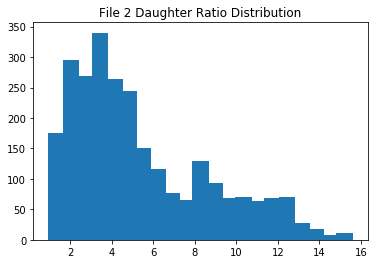

In [7]:
file = 1
plt.bar(LMOutput[0]['measure1BinCentres'][file], LMOutput[0]['measure1BinCounts'][file])
plt.title("File 2 Diameter Distribution")
plt.show()

plt.bar(LMOutput[1]['measure1BinCentres'][file], LMOutput[1]['measure1BinCounts'][file])
plt.title("File 2 Daughter Ratio Distribution")
plt.show()

# One measure vs another (bin sums)

Compute the dependence of one measure on another

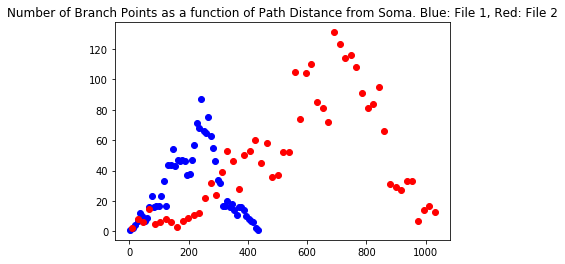

In [8]:
LMOutput = getMeasureDependence(['N_bifs'], ['PathDistance'], swcFiles, nBins=55, average=False)

plt.plot(LMOutput[0]['measure1BinCentres'][0], LMOutput[0]['measure2BinSums'][0], 'bo')
plt.plot(LMOutput[0]['measure1BinCentres'][1], LMOutput[0]['measure2BinSums'][1], 'ro')
plt.title("Number of Branch Points as a function of Path Distance from Soma. Blue: File 1, Red: File 2")
plt.show()

# One measure vs another (bin means + stdevs)

Compute the dependence of one measure on another

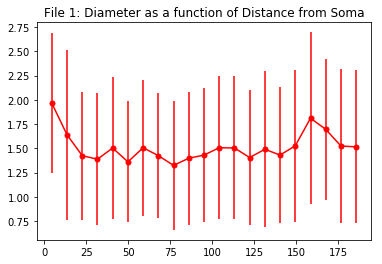

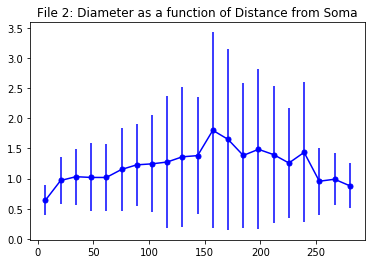

In [9]:
LMOutput = getMeasureDependence(['Diameter'], ['EucDistance'], swcFiles, nBins=21, average=True)
plt.figure()
plt.errorbar(LMOutput[0]['measure1BinCentres'][0],
             LMOutput[0]['measure2BinAverages'][0],
             LMOutput[0]['measure2BinStdDevs'][0],
                color='r', ls='-', marker='o', ms=5, mfc='r')
plt.title("File 1: Diameter as a function of Distance from Soma")
plt.draw()
plt.show(block=False)


plt.figure()
plt.errorbar(LMOutput[0]['measure1BinCentres'][1],
             LMOutput[0]['measure2BinAverages'][1],
             LMOutput[0]['measure2BinStdDevs'][1],
                color='b', ls='-', marker='o', ms=5, mfc='b')
plt.title("File 2: Diameter as a function of Distance from Soma")
plt.draw()
plt.show(block=False)